In [2]:
!pip install nilearn==0.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import numpy as np
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import matplotlib
from matplotlib import pyplot as plt
from nilearn import datasets
from nilearn import plotting
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names
from torchvision import transforms
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as corr

import tensorflow_datasets as tfds
import tensorflow as tf

In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf

from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [5]:
from tensorflow.keras.layers.experimental.preprocessing import Resizing

# Load data

Loading the NSD images from colab and storing them in a npy file

In [6]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
os.chdir ("drive/MyDrive")

data_dir = '/content/drive/MyDrive/algonauts_2023_tutorial_data' 
parent_submission_dir = '/content/drive/MyDrive/algonauts_2023_challenge_submission' 

Mounted at /content/drive


In [13]:
### SAVE TRAIN IMAGES AS TENSORS ###
'''
############################################# NICHT MEHR AUSFÜHREN ############################################
###############################################################################################################
img_list = list()
resize_layer = Resizing(32, 32)

for i in range(1,9):

  PATH = "/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_images".format(i)

  with os.scandir(PATH) as f:
      for entry in f:
          if not entry.name.startswith('.') and entry.is_file():
              img = Image.open(os.path.join(PATH, entry.name))

              # Apply the Resizing layer to the datasets
              img = resize_layer(img)
              
              img = tf.convert_to_tensor(img, dtype=tf.float32)
              img_list.append(img)

  np.save('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj0{}'.format(i), img_list)
  print('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj0{}'.format(i))
  img_list.clear()
'''

'\n############################################# NICHT MEHR AUSFÜHREN ############################################\n###############################################################################################################\nimg_list = list()\nresize_layer = Resizing(32, 32)\n\nfor i in range(1,9):\n\n  PATH = "/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_images".format(i)\n\n  with os.scandir(PATH) as f:\n      for entry in f:\n          if not entry.name.startswith(\'.\') and entry.is_file():\n              img = Image.open(os.path.join(PATH, entry.name))\n\n              # Apply the Resizing layer to the datasets\n              img = resize_layer(img)\n              \n              img = tf.convert_to_tensor(img, dtype=tf.float32)\n              img_list.append(img)\n\n  np.save(\'/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj0{}\'.format(i), img_list)\n  print(\'/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-ima

In [14]:
'''
### PUT ALL TRAIN IMAGES FROM DIFFERENT SUBJ TOGETHER ###
nsd_train_images = np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj01.npy')

for i in range(2,9):
  nsd_train_images = np.concatenate((nsd_train_images, np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj0{}.npy'.format(i))), axis=0)

print(len(nsd_train_images))
'''

"\n### PUT ALL TRAIN IMAGES FROM DIFFERENT SUBJ TOGETHER ###\nnsd_train_images = np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj01.npy')\n\nfor i in range(2,9):\n  nsd_train_images = np.concatenate((nsd_train_images, np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj0{}.npy'.format(i))), axis=0)\n\nprint(len(nsd_train_images))\n"

In [15]:
### SAVE TEST IMAGES AS TENSORS ###
'''
########################### NICHT MEHR AUSFÜHREN ##############################
img_list = list()
resize_layer = Resizing(32, 32)

for i in range(1,9):

  PATH = "/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/test_split/test_images".format(i)

  with os.scandir(PATH) as f:
      for entry in f:
          if not entry.name.startswith('.') and entry.is_file():
              img = Image.open(os.path.join(PATH, entry.name))

              # Apply the Resizing layer to the datasets
              img = resize_layer(img)
              
              img = tf.convert_to_tensor(img, dtype=tf.float32)
              img_list.append(img)

  np.save('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_test-images_subj0{}'.format(i), img_list)
  print('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_test-images_subj0{}'.format(i))
  img_list.clear()
'''

'\n########################### NICHT MEHR AUSFÜHREN ##############################\nimg_list = list()\nresize_layer = Resizing(32, 32)\n\nfor i in range(1,9):\n\n  PATH = "/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/test_split/test_images".format(i)\n\n  with os.scandir(PATH) as f:\n      for entry in f:\n          if not entry.name.startswith(\'.\') and entry.is_file():\n              img = Image.open(os.path.join(PATH, entry.name))\n\n              # Apply the Resizing layer to the datasets\n              img = resize_layer(img)\n              \n              img = tf.convert_to_tensor(img, dtype=tf.float32)\n              img_list.append(img)\n\n  np.save(\'/content/drive/MyDrive/FinalProject/NSD_Data/nsd_test-images_subj0{}\'.format(i), img_list)\n  print(\'/content/drive/MyDrive/FinalProject/NSD_Data/nsd_test-images_subj0{}\'.format(i))\n  img_list.clear()\n'

In [16]:
'''
### PUT ALL TEST IMAGES FROM DIFFERENT SUBJ TOGETHER ###
nsd_test_images = np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_test-images_subj01.npy')

for i in range(2,9):
  nsd_test_images = np.concatenate((nsd_test_images, np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_test-images_subj0{}.npy'.format(i))), axis=0)

'''

"\n### PUT ALL TEST IMAGES FROM DIFFERENT SUBJ TOGETHER ###\nnsd_test_images = np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_test-images_subj01.npy')\n\nfor i in range(2,9):\n  nsd_test_images = np.concatenate((nsd_test_images, np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_test-images_subj0{}.npy'.format(i))), axis=0)\n\n"

In [17]:
'''
### LOAD FMRI RESPONSES ###
nsd_train_lh = np.load('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_fmri/lh_training_fmri.npy'.format(1))
nsd_train_rh = np.load('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_fmri/rh_training_fmri.npy'.format(1))

for i in range(2,9):

  nsd_train_lh = np.concatenate((nsd_train_lh, np.load('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_fmri/lh_training_fmri.npy'.format(i))), axis=0)
  #nsd_train_rh = np.concatenate((nsd_train_rh, np.load('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_fmri/rh_training_fmri.npy'.format(i))), axis=0)

print(len(nsd_train_lh))
print(len(nsd_train_rh))
'''

"\n### LOAD FMRI RESPONSES ###\nnsd_train_lh = np.load('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_fmri/lh_training_fmri.npy'.format(1))\nnsd_train_rh = np.load('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_fmri/rh_training_fmri.npy'.format(1))\n\nfor i in range(2,9):\n\n  nsd_train_lh = np.concatenate((nsd_train_lh, np.load('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_fmri/lh_training_fmri.npy'.format(i))), axis=0)\n  #nsd_train_rh = np.concatenate((nsd_train_rh, np.load('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj0{}/training_split/training_fmri/rh_training_fmri.npy'.format(i))), axis=0)\n\nprint(len(nsd_train_lh))\nprint(len(nsd_train_rh))\n"

In [7]:
### LOAD FMRI RESPONSES ###



subj01_train_lh = np.load(os.path.join(os.path.join('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj01', 'training_split', 'training_fmri'), 'lh_training_fmri.npy'))
subj01_train_rh = np.load(os.path.join(os.path.join('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj01', 'training_split', 'training_fmri'), 'rh_training_fmri.npy'))

# Preprocess

In [8]:
############# PREPROCESS ################

def preprocess(x_train_data):

    # convert the 2d array output labels into 1D array
    x_train_data = x_train_data.astype('float32')

    # normalizing the training and testing data
    x_train_data /= 255.0
    
    return x_train_data


nsd_train_images = preprocess(np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj01.npy'))

#nsd_test_images = preprocess(nsd_test_images_allSubj)

In [20]:
### CREATE DATASETS ###
'''
train_dataset_lh = tf.data.Dataset.from_tensor_slices((nsd_train_images, nsd_fmri_lh_allSubj))
train_dataset_rh = tf.data.Dataset.from_tensor_slices((nsd_train_images, nsd_fmri_rh_allSubj))
'''

'\ntrain_dataset_lh = tf.data.Dataset.from_tensor_slices((nsd_train_images, nsd_fmri_lh_allSubj))\ntrain_dataset_rh = tf.data.Dataset.from_tensor_slices((nsd_train_images, nsd_fmri_rh_allSubj))\n'

# Visualization

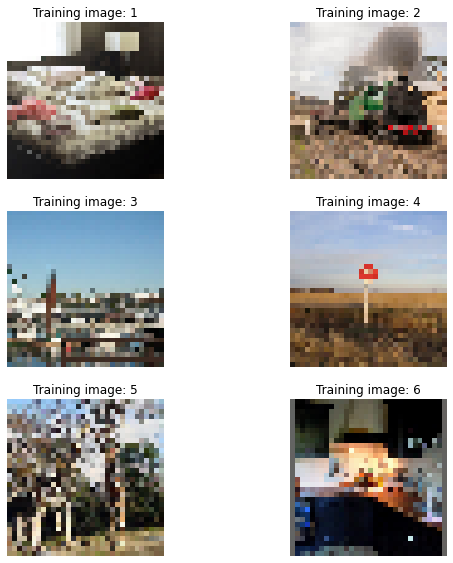

In [9]:
def visualize(images):
    fig, axes = plt.subplots(3,2, figsize=(8,8))
    fig.tight_layout()

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i])
        ax.set_title('Training image: ' + str(i+1))
        ax.axis("off")

visualize(nsd_train_images)

# Model

In [10]:
############# MODEL ####################

def create_CNN_model():

    model = Sequential()
    model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
    model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
    #model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
    model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
    model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
    #model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(100, activation='softmax'))


    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

    return model


In [11]:
########### LOAD OLD WEIGHTS #########

# Create a new model instance
new_model = create_CNN_model()

# Restore the weights
new_model.load_weights('/content/drive/MyDrive/checkpoints/my_new_checkpoint')

# Evaluate the model
loss, acc = new_model.evaluate(nsd_train_images, np.zeros(len(nsd_train_images)))
print("test accuracy: ", acc)


308/308 [==============================] - 3s 7ms/step - loss: 14.0464 - accuracy: 1.0162e-04
test accuracy:  0.00010161568934563547


# Lin Reg


In [12]:
from keras import backend as K
# model = cnn_model
# with a Sequential model

def output_to_input(model, layer_number, data):
      
    get_layer_output = K.function([model.layers[0].input],
                                      [model.layers[layer_number].output])
    layer_output = get_layer_output([data])[0]
    hidden_layer_outputs_flat = tf.keras.layers.Flatten()(layer_output)

    return hidden_layer_outputs_flat





subj01_train_lh = np.load(os.path.join(os.path.join('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj01', 'training_split', 'training_fmri'), 'lh_training_fmri.npy'))
subj01_train_rh = np.load(os.path.join(os.path.join('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj01', 'training_split', 'training_fmri'), 'rh_training_fmri.npy'))

subj06_train_lh = np.load(os.path.join(os.path.join('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj06', 'training_split', 'training_fmri'), 'lh_training_fmri.npy'))
subj06_train_rh = np.load(os.path.join(os.path.join('/content/drive/MyDrive/algonauts_2023_tutorial_data/subj06', 'training_split', 'training_fmri'), 'rh_training_fmri.npy'))



nsd_train_images = preprocess(np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj01.npy'))
nsd_train_images6 = preprocess(np.load('/content/drive/MyDrive/FinalProject/NSD_Data/nsd_train-images_subj06.npy'))

features = output_to_input(new_model, 3, nsd_train_images)
print(features.shape)
print(type(features))
#print(features)

features6 = output_to_input(new_model, 3, nsd_train_images6)

regr_l = LinearRegression()

regr_l.fit(features, subj01_train_lh)
regr_l.fit(features6, subj06_train_lh)

'''
reg_lh = LinearRegression().fit(features, subj01_train_lh)
reg_rh = LinearRegression().fit(features, subj01_train_rh)
#reg_rh = LinearRegression().fit(features_train, rh_fmri_train)
reg_lh = LinearRegression().fit(features6, subj06_train_lh)
reg_rh = LinearRegression().fit(features6, subj06_train_rh)
'''

'''
out_input = output_to_input(cnn_model, 2, x_test_cifar)

regression_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(hidden_layer_outputs_flat.shape[1],))
])
regression_model.compile(loss='mse', optimizer='adam')
regression_model.fit(out_input, y_test_cifar, epochs=10)

'''

(9841, 1024)
<class 'tensorflow.python.framework.ops.EagerTensor'>


"\nout_input = output_to_input(cnn_model, 2, x_test_cifar)\n\nregression_model = tf.keras.Sequential([\n    tf.keras.layers.Dense(1, activation='linear', input_shape=(hidden_layer_outputs_flat.shape[1],))\n])\nregression_model.compile(loss='mse', optimizer='adam')\nregression_model.fit(out_input, y_test_cifar, epochs=10)\n\n"

In [ ]:
# Fit linear regressions on the training data
reg_lh = LinearRegression().fit(features_train, lh_fmri_train)

reg_rh = LinearRegression().fit(features_train, rh_fmri_train)
# Use fitted linear regressions to predict the validation and test fMRI data
lh_fmri_val_pred = reg_lh.predict(features_val)
lh_fmri_test_pred = reg_lh.predict(features_test)

rh_fmri_val_pred = reg_rh.predict(features_val)
rh_fmri_test_pred = reg_rh.predict(features_test)

In [ ]:
rand_seed = 5 #@param
np.random.seed(rand_seed)

# Calculate how many stimulus images correspond to 90% of the training data
num_train = int(np.round(len(train_img_list) / 100 * 90))
# Shuffle all training stimulus images
idxs = np.arange(len(train_img_list))
np.random.shuffle(idxs)
# Assign 90% of the shuffled stimulus images to the training partition,
# and 10% to the test partition
idxs_train, idxs_val = idxs[:num_train], idxs[num_train:]
# No need to shuffle or split the test stimulus images
idxs_test = np.arange(len(test_img_list))

print('Training stimulus images: ' + format(len(idxs_train)))
print('\nValidation stimulus images: ' + format(len(idxs_val)))
print('\nTest stimulus images: ' + format(len(idxs_test)))

In [ ]:
#Here we will use the previously defined indices to split the training fMRI data into a training and validation partition.
lh_fmri_train = lh_fmri[idxs_train]
lh_fmri_val = lh_fmri[idxs_val]
rh_fmri_train = rh_fmri[idxs_train]
rh_fmri_val = rh_fmri[idxs_val]

In [ ]:
features_train = extract_features(feature_extractor, train_imgs_dataloader, pca)
features_val = extract_features(feature_extractor, val_imgs_dataloader, pca)
features_test = extract_features(feature_extractor, test_imgs_dataloader, pca)

print('\nTraining images features:')
print(features_train.shape)
print('(Training stimulus images × PCA features)')

print('\nValidation images features:')
print(features_val.shape)
print('(Validation stimulus images × PCA features)')

print('\nTest images features:')
print(features_val.shape)
print('(Test stimulus images × PCA features)')